<a href="https://colab.research.google.com/github/athirakmenon/FINAL-PROJECT/blob/main/H_C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING NECESSARY** **LIBRARIES**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

**READ THE CSV** **DATA**

In [2]:
data = '/content/Neutronstars.csv'
n_data= pd.read_csv(data, sep=';', skiprows=3,skipfooter=6, na_values=['*'])

n_data

,#,NAME,PSRJ,P0,P1,F0,F1,DM,RM,W50,S1400,BINARY,DIST,AGE,Unnamed: 14
0,NaN,NaN,NaN,(s),NaN,(Hz),(s^-2),(cm^-3pc),(radm^-2),(ms),(mJy),(type),(kpc),(Yr),NaN
1,1.0,J0002+6216,J0002+6216,0.115364,5.970000e-15,8.668248,-4.484e-13,218.60,NaN,NaN,0.02,NaN,6.357,3.06e+05,NaN
2,2.0,J0006+1834,J0006+1834,0.693748,2.100000e-15,1.441446,-4.357e-15,11.40,-20.00,82.000,NaN,NaN,0.860,5.24e+06,NaN
3,3.0,J0007+7303,J0007+7303,0.315873,3.600000e-13,3.165827,-3.612e-12,NaN,NaN,NaN,NaN,NaN,1.400,1.39e+04,NaN
4,4.0,J0011+08,J0011+08,2.552870,NaN,0.391716,NaN,24.90,NaN,28.000,NaN,NaN,5.399,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,3530.0,B2351+61,J2354+6155,0.944784,1.630000e-14,1.058443,-1.822e-14,94.66,-75.90,10.400,5.00,NaN,2.400,9.20e+05,NaN
3531,3531.0,J2354-22,J2354-22,0.557996,NaN,1.792128,NaN,9.90,NaN,9.000,NaN,NaN,1.108,NaN,NaN
3532,3532.0,J2355+0051,J2355+0051,0.003719,3.220000e-21,268.890043,-2.330e-16,11.15,-0.10,NaN,0.16,ELL1,0.958,1.83e+10,NaN
3533,3533.0,J2355+1523,J2355+1523,1.094396,4.190000e-16,0.913746,-3.500e-16,26.00,NaN,NaN,NaN,NaN,3.444,4.14e+07,NaN


# **DATA** **PREPROCESSING**

In [3]:
#Checking for null values
n_data.isnull().sum()

,0
#,1
NAME,1
PSRJ,1
P0,57
P1,867
F0,57
F1,866
DM,119
RM,1996
W50,914


In [4]:
#Dropping columns ='#','Unnamed:14'
new_data =n_data.iloc[:, 1:-1].drop(index=0).reset_index(drop=True)
new_data

,NAME,PSRJ,P0,P1,F0,F1,DM,RM,W50,S1400,BINARY,DIST,AGE
0,J0002+6216,J0002+6216,0.115364,5.970000e-15,8.668248,-4.484e-13,218.60,NaN,NaN,0.02,NaN,6.357,3.06e+05
1,J0006+1834,J0006+1834,0.693748,2.100000e-15,1.441446,-4.357e-15,11.40,-20.00,82.000,NaN,NaN,0.860,5.24e+06
2,J0007+7303,J0007+7303,0.315873,3.600000e-13,3.165827,-3.612e-12,NaN,NaN,NaN,NaN,NaN,1.400,1.39e+04
3,J0011+08,J0011+08,2.552870,NaN,0.391716,NaN,24.90,NaN,28.000,NaN,NaN,5.399,NaN
4,J0012+5431,J0012+5431,3.025301,1.280000e-16,0.330546,-1.400e-17,131.30,NaN,NaN,NaN,NaN,5.425,3.74e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,B2351+61,J2354+6155,0.944784,1.630000e-14,1.058443,-1.822e-14,94.66,-75.90,10.400,5.00,NaN,2.400,9.20e+05
3530,J2354-22,J2354-22,0.557996,NaN,1.792128,NaN,9.90,NaN,9.000,NaN,NaN,1.108,NaN
3531,J2355+0051,J2355+0051,0.003719,3.220000e-21,268.890043,-2.330e-16,11.15,-0.10,NaN,0.16,ELL1,0.958,1.83e+10
3532,J2355+1523,J2355+1523,1.094396,4.190000e-16,0.913746,-3.500e-16,26.00,NaN,NaN,NaN,NaN,3.444,4.14e+07


In [5]:
#checking data types
print(new_data.dtypes)

NAME       object
PSRJ       object
P0         object
P1        float64
F0         object
F1         object
DM         object
RM         object
W50        object
S1400      object
BINARY     object
DIST       object
AGE        object
dtype: object


In [6]:
#Coverting relevent column to numeric
columns_to_convert = ['P0', 'F0', 'F1', 'DM', 'RM', 'W50', 'S1400', 'DIST', \
                      'AGE']
for col in columns_to_convert:
    new_data[col] = pd.to_numeric(new_data[col], errors='coerce')

In [7]:
#checking converted dtypes
print(new_data.dtypes)

NAME       object
PSRJ       object
P0        float64
P1        float64
F0        float64
F1        float64
DM        float64
RM        float64
W50       float64
S1400     float64
BINARY     object
DIST      float64
AGE       float64
dtype: object


In [ ]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P0,3477.0,8.379762e-01,1.256985e+00,1.396000e-03,1.824950e-01,4.996950e-01,1.023504e+00,2.353538e+01
P1,2668.0,3.941206e-13,1.101897e-11,-2.760000e-15,8.280000e-17,1.260000e-15,6.227500e-15,5.490000e-10
F0,3477.0,4.537562e+01,1.106748e+02,4.248900e-02,9.770360e-01,2.001221e+00,5.479608e+00,7.163556e+02
F1,2668.0,-7.852899e-13,9.781081e-12,-3.775000e-10,-1.902250e-14,-2.246000e-15,-4.662000e-16,4.660000e-14
DM,3415.0,2.070177e+02,2.075401e+02,2.380000e+00,5.248500e+01,1.347000e+02,2.935700e+02,1.778000e+03
RM,1538.0,-8.770117e+00,1.770387e+03,-6.608000e+04,-4.200000e+01,1.000000e+01,9.730000e+01,1.325300e+04
W50,2620.0,2.512631e+01,3.852572e+01,3.500000e-02,6.900000e+00,1.400000e+01,2.900000e+01,6.599000e+02
S1400,2439.0,2.077175e+00,2.316205e+01,0.000000e+00,1.300000e-01,3.200000e-01,9.000000e-01,1.050000e+03
DIST,3459.0,6.074056e+00,6.729197e+00,9.300000e-02,2.371000e+00,4.500000e+00,7.215000e+00,6.026100e+01
AGE,2608.0,1.749508e+09,3.246446e+10,2.180000e+02,1.600000e+06,9.190000e+06,8.487500e+07,1.640000e+12


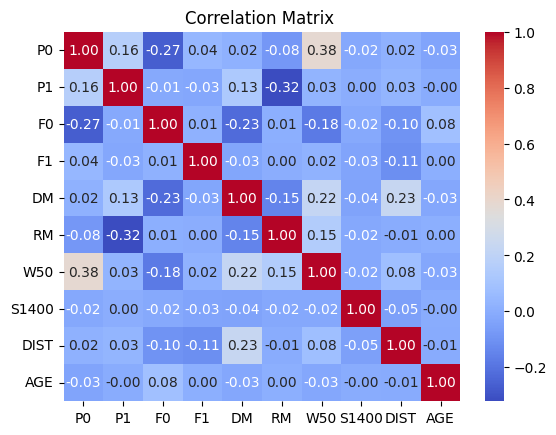

In [8]:

# Select relevant columns for correlation
cordata_= new_data[[ 'P0', 'P1','F0', 'F1','DM', 'RM', 'W50', 'S1400', 'DIST', 'AGE']]

# Compute the correlation matrix
corr_matrix = cordata_.corr()

# Display the correlation matrix
corr_matrix

# Plot the correlation matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ')
plt.show()

checking for conditions



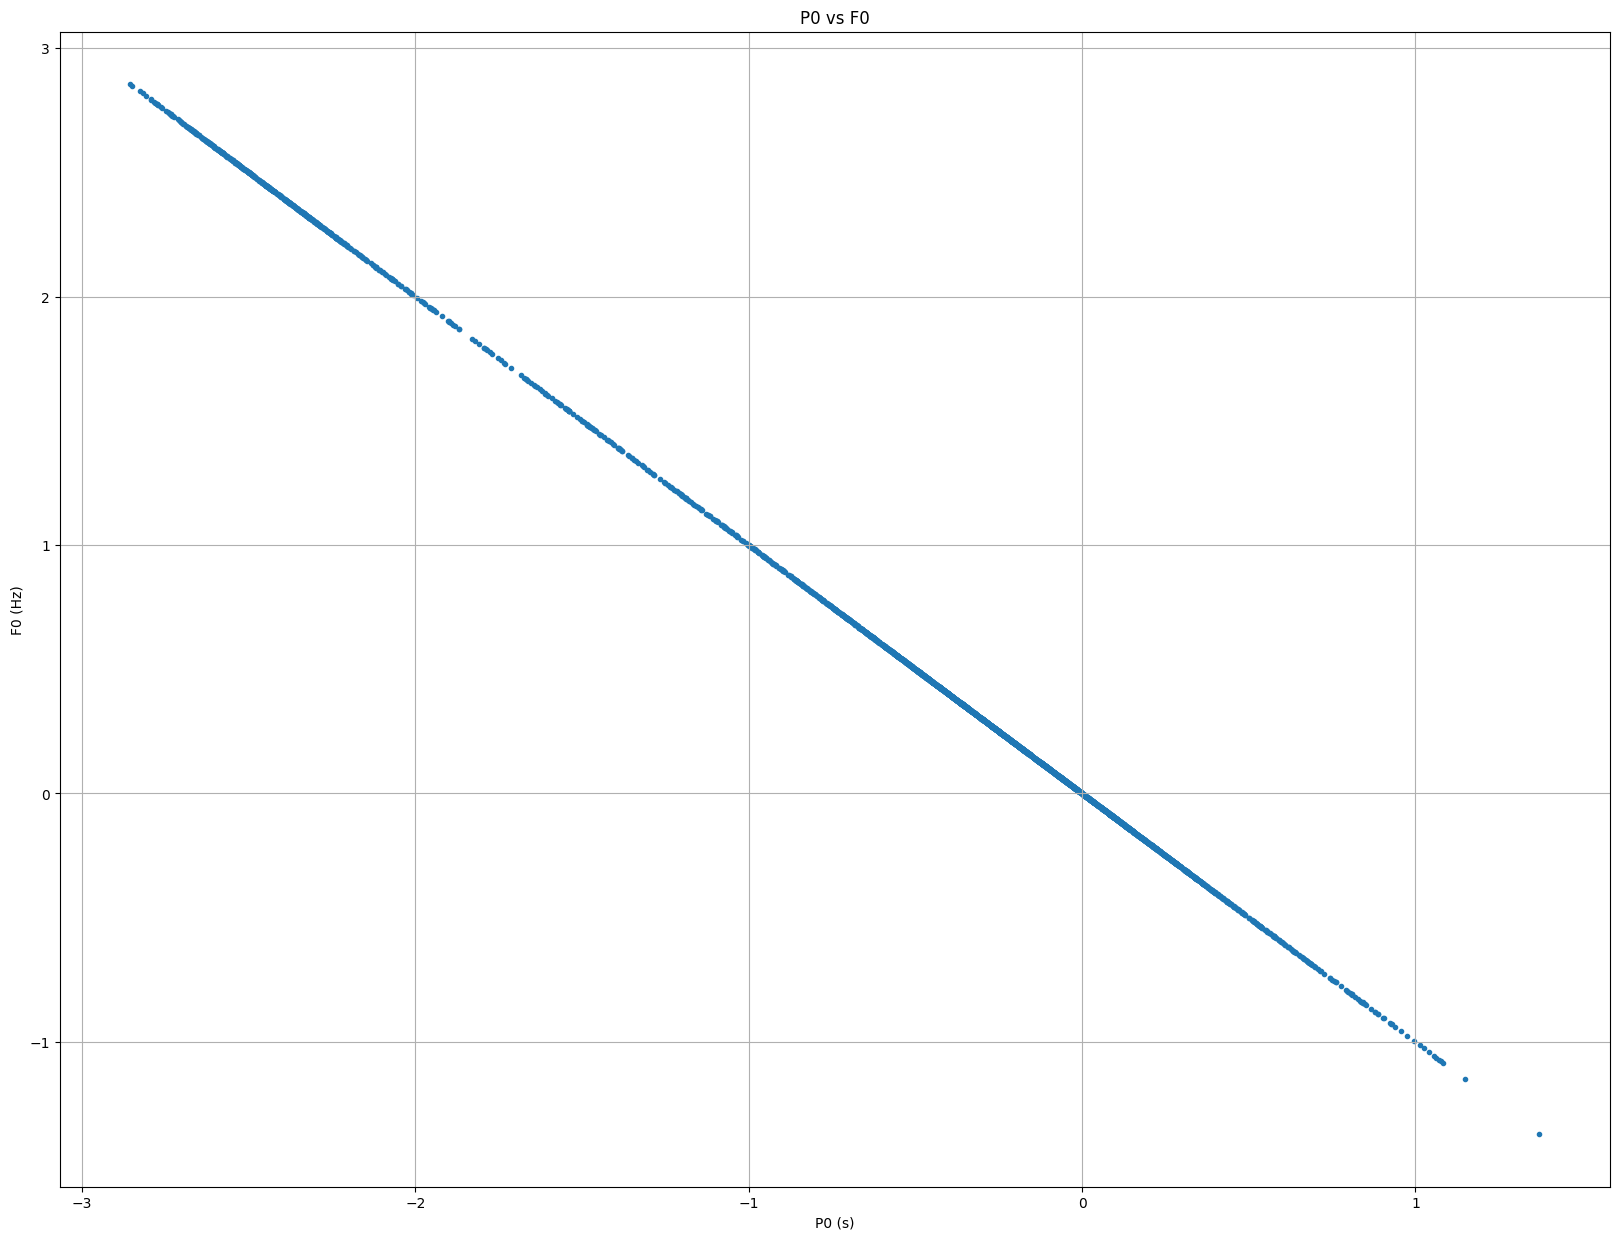

In [9]:
plt.figure(figsize=(20, 15))
plt.scatter(np.log10(new_data['P0']),np.log10( new_data['F0']), marker='.')
plt.title('P0 vs F0')
plt.xlabel('P0 (s)')
plt.ylabel('F0 (Hz)')
plt.grid(True)
plt.show()

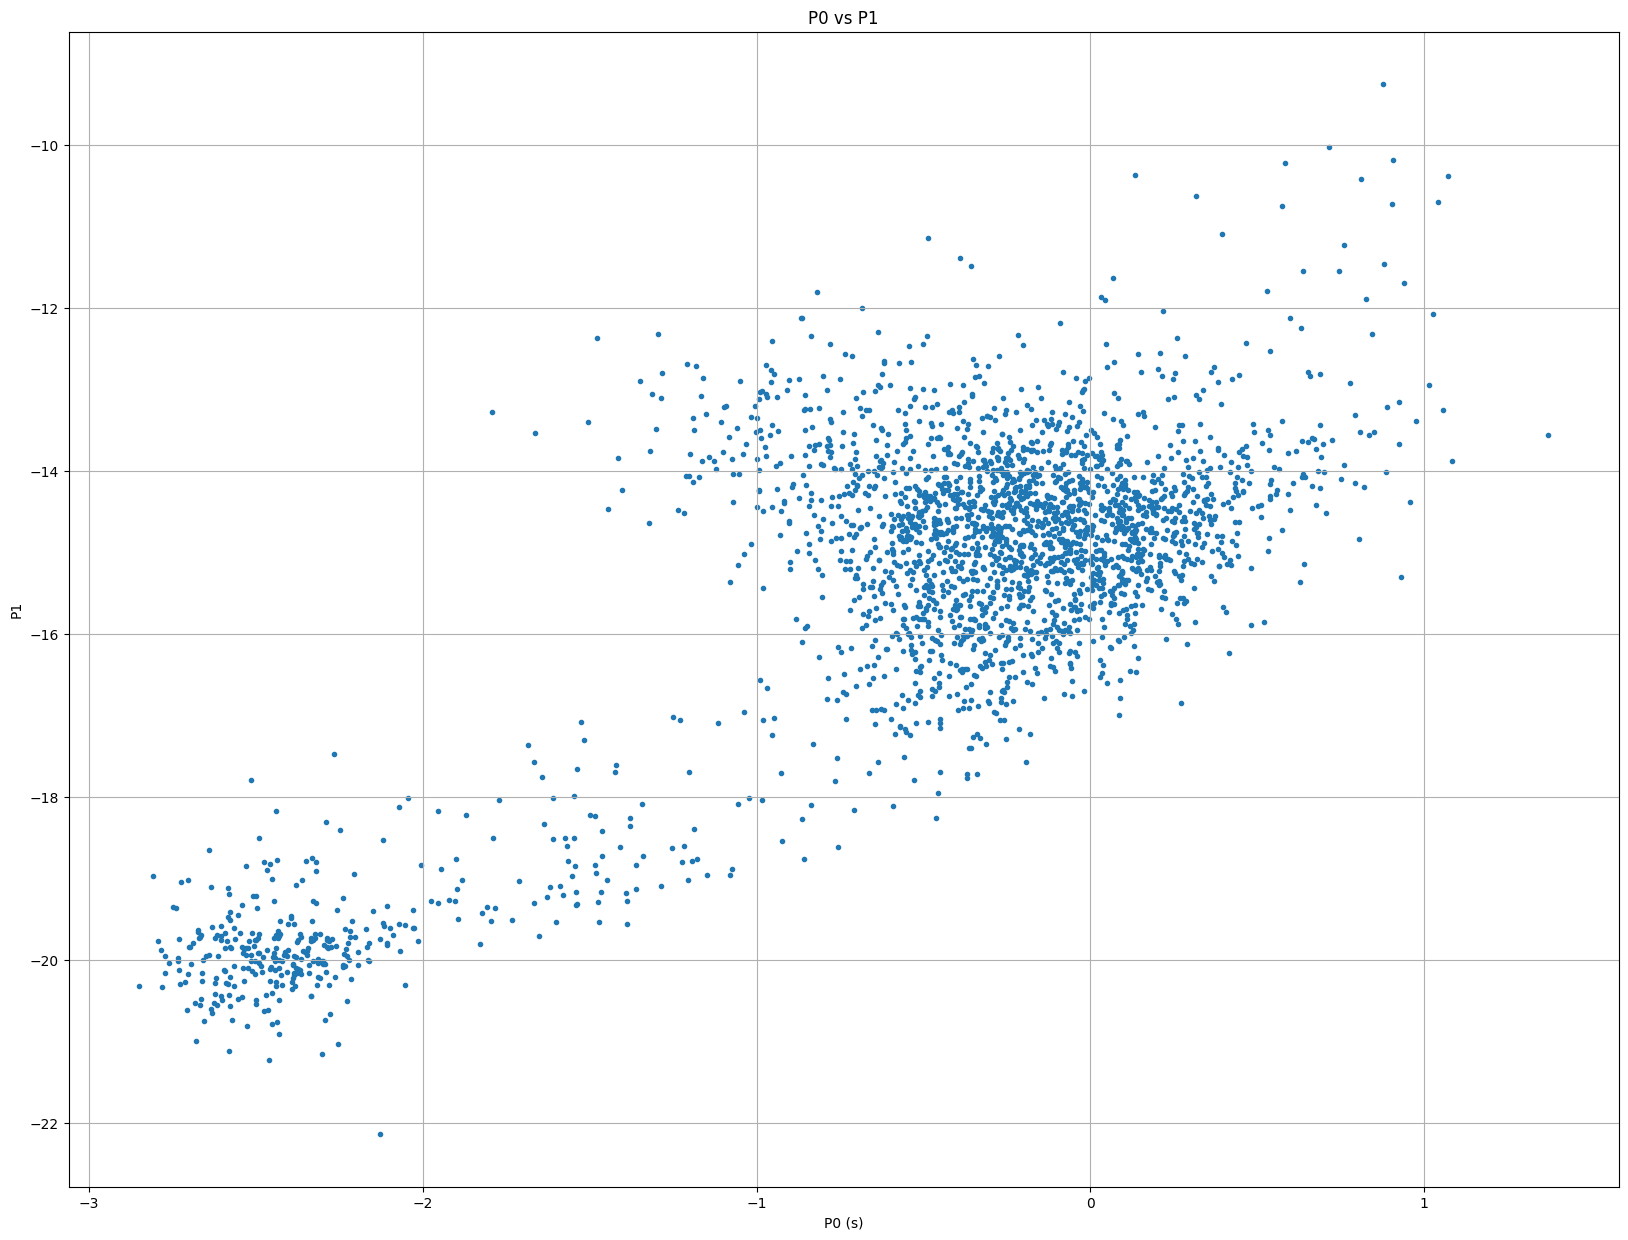

In [10]:
plt.figure(figsize=(20, 15))
plt.scatter(np.log10(new_data['P0']),np.log10(new_data['P1']),marker='.')
plt.title('P0 vs P1')
plt.xlabel('P0 (s)')
plt.ylabel('P1')
plt.grid(True)
plt.show()

In [11]:
# Droping rows containing null values for P0 and P1
filtered_data=new_data.dropna(subset=['P0','P1','S1400','DM'])

# filtering out the non positive P1 values
filtered_data = filtered_data[(filtered_data['P1'] > 0)]


             P0        P1        F0        F1        DM        RM       W50  \
P0     1.000000  0.045542 -0.247488  0.041536  0.033915  0.011517  0.400004   
P1     0.045542  1.000000 -0.016549 -0.073721  0.085725  0.017642  0.026896   
F0    -0.247488 -0.016549  1.000000  0.009233 -0.248212 -0.016100 -0.160236   
F1     0.041536 -0.073721  0.009233  1.000000  0.001468  0.000701  0.023947   
DM     0.033915  0.085725 -0.248212  0.001468  1.000000  0.132726  0.223863   
RM     0.011517  0.017642 -0.016100  0.000701  0.132726  1.000000  0.048334   
W50    0.400004  0.026896 -0.160236  0.023947  0.223863  0.048334  1.000000   
S1400 -0.026172  0.000710 -0.011747 -0.038549 -0.038239 -0.016159 -0.017935   
DIST   0.030670 -0.003812 -0.147303 -0.050223  0.281437  0.013126  0.086667   
AGE   -0.037226 -0.002615  0.085994  0.003373 -0.028483  0.010454 -0.024587   

          S1400      DIST       AGE  
P0    -0.026172  0.030670 -0.037226  
P1     0.000710 -0.003812 -0.002615  
F0    -0.011747 

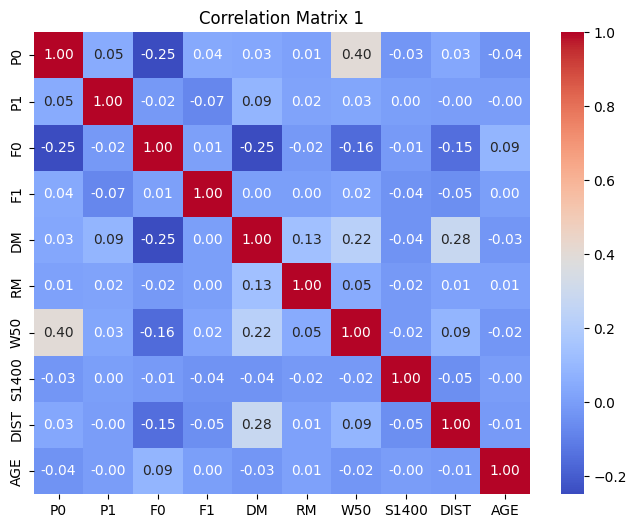

In [12]:
# selecting features for checking correlation after removing null and non positive values
data_cor_1 = filtered_data[[ 'P0', 'P1','F0', 'F1','DM', 'RM', 'W50', 'S1400', 'DIST', 'AGE']]


corr_matrix_1= data_cor_1.corr()

# print the correlation matrix
print(corr_matrix_1)

# Ploting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix 1')
plt.show()

In [13]:

# Applying log transformation on P1 and P0 into new respective columns
filtered_data['log_P0'] =np.log10(filtered_data['P0'])
filtered_data['log_P1'] =np.log10(filtered_data['P1'])
filtered_data['log_AGE']= np.log10(filtered_data['AGE'])

# reseting index
filtered_data = filtered_data.reset_index(drop=True)

filtered_data

,NAME,PSRJ,P0,P1,F0,F1,DM,RM,W50,S1400,BINARY,DIST,AGE,log_P0,log_P1,log_AGE
0,J0002+6216,J0002+6216,0.115364,5.970000e-15,8.668248,-4.484000e-13,218.60,NaN,NaN,0.02,NaN,6.357,3.060000e+05,-0.937930,-14.224026,5.485721
1,B0011+47,J0014+4746,1.240699,5.640000e-16,0.805997,-3.667000e-16,30.41,-15.56,88.7,3.00,NaN,1.776,3.480000e+07,0.093666,-15.248721,7.541579
2,J0021-0909,J0021-0909,2.314131,1.040000e-15,0.432128,-1.940000e-16,25.20,-15.00,23.8,0.13,NaN,25.000,3.530000e+07,0.364388,-14.982967,7.547775
3,J0023+0923,J0023+0923,0.003050,1.140000e-20,327.847021,-1.228000e-15,14.32,-5.10,NaN,0.73,ELL1,1.818,4.230000e+09,-2.515700,-19.943095,9.626340
4,J0026+6320,J0026+6320,0.318358,1.510000e-16,3.141120,-1.486000e-15,245.06,-294.00,8.1,1.00,NaN,6.619,3.350000e+07,-0.497084,-15.821023,7.525045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,J2333+6145,J2333+6145,0.756899,1.180000e-15,1.321180,-2.053000e-15,125.00,NaN,23.0,0.47,NaN,2.729,1.020000e+07,-0.120962,-14.928118,7.008600
2054,B2334+61,J2337+6151,0.495370,1.930000e-13,2.018694,-7.883000e-13,58.41,-100.00,14.5,1.40,NaN,0.700,4.060000e+04,-0.305070,-12.714443,4.608526
2055,J2346-0609,J2346-0609,1.181463,1.360000e-15,0.846408,-9.765000e-16,22.50,-5.00,51.0,2.00,NaN,3.500,1.370000e+07,0.072420,-14.866461,7.136721
2056,B2351+61,J2354+6155,0.944784,1.630000e-14,1.058443,-1.822000e-14,94.66,-75.90,10.4,5.00,NaN,2.400,9.200000e+05,-0.024667,-13.787812,5.963788


# **K**-**MEANS** **CLUSTERING** **WITH** **2** **FEATURES**

In [14]:
#selected features for unsupervised learning
X =filtered_data[['log_P0','log_P1']]

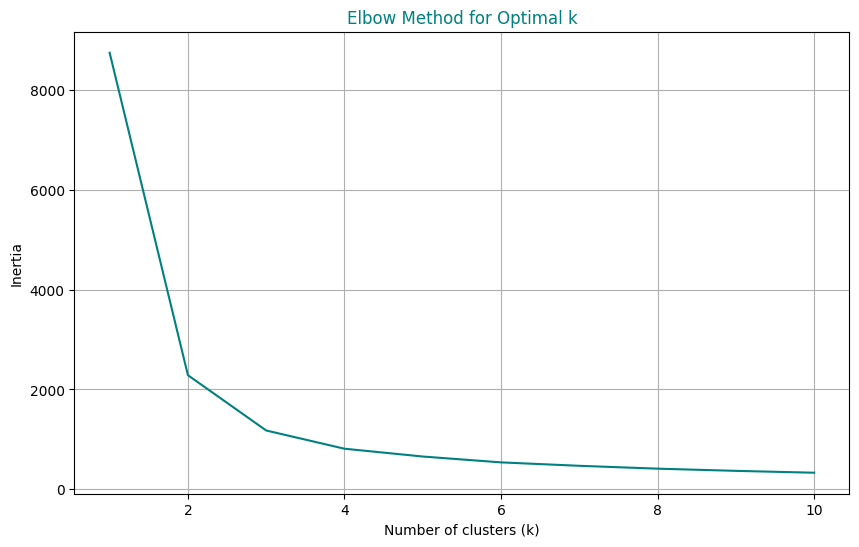

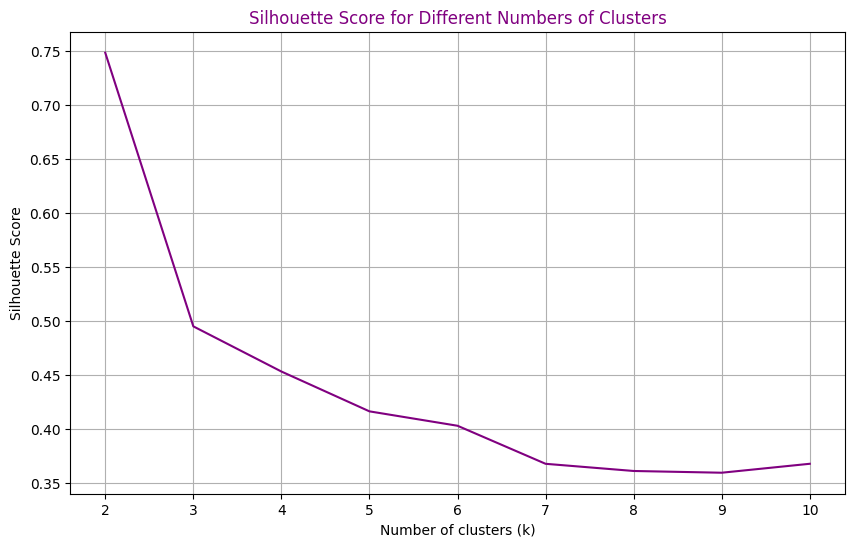

In [40]:
#looking for optimal K values by using the Elbow method and Silhouette scores

K = range(1, 11)
inertia = []
silhouette_scores = []

#Elbow method
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, color='teal')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', color='teal')
plt.grid(True)
plt.show()


#silhouette score
for k in K[1:]:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X)
  silhouette_scores.append(silhouette_score(X,labels))


# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, label='Silhouette Score', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)

plt.show()

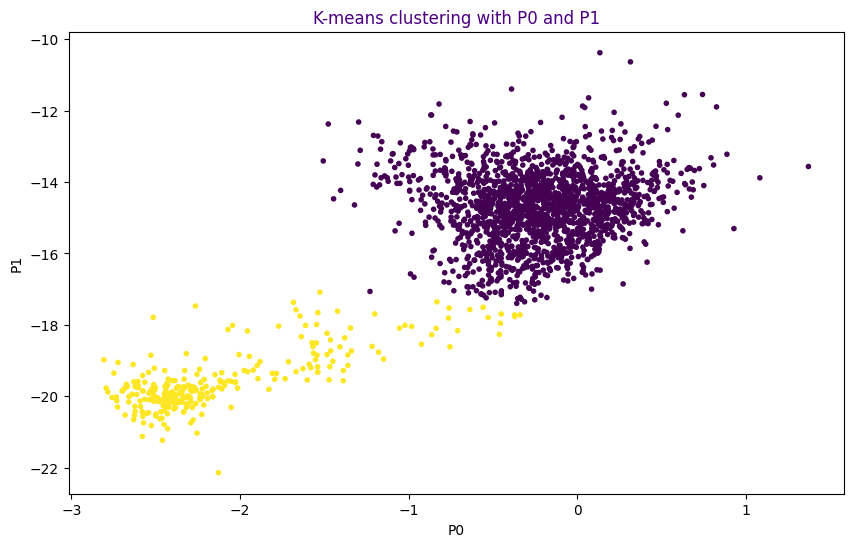

In [16]:
#applying K means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state = 42)
filtered_data['Cluster'] = kmeans.fit_predict(X)

#plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(filtered_data['log_P0'],
            filtered_data['log_P1'],
            cmap='viridis',
            c=filtered_data['Cluster'],
            marker='.'
            )
plt.xlabel('P0')
plt.ylabel('P1')
plt.title('K-means clustering with P0 and P1',color='indigo')
plt.show()

In [17]:
#creating paramgrids for optimizing K-Means
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500],
    'tol': [1e-4, 1e-3, 1e-2]
}

# defining silhouette scorer function to get custom silhouette score
def silhouette_scorer(estimator, X):
  return silhouette_score(X, estimator.fit_predict(X))


#initializing  GridsearchCV
grid_searchCV = GridSearchCV(KMeans(random_state = 42),
                             param_grid,
                             scoring=silhouette_scorer
                             )

#fit GridSearchCV
grid_searchCV.fit(X)

#find best parameter with grid search
best_parameters = grid_searchCV.best_params_
print("The best parameters found:",best_parameters)



The best parameters found: {'init': 'random', 'max_iter': 300, 'n_init': 30, 'tol': 0.0001}


In [18]:
#apply KMeans with best parameters
kmeans= KMeans(n_clusters=2,
               init=best_parameters['init'],
               n_init=best_parameters['n_init'],
               max_iter=best_parameters['max_iter'],
               tol=best_parameters['tol'],
               random_state=42)

filtered_data['Cluster'] = kmeans.fit_predict(X)

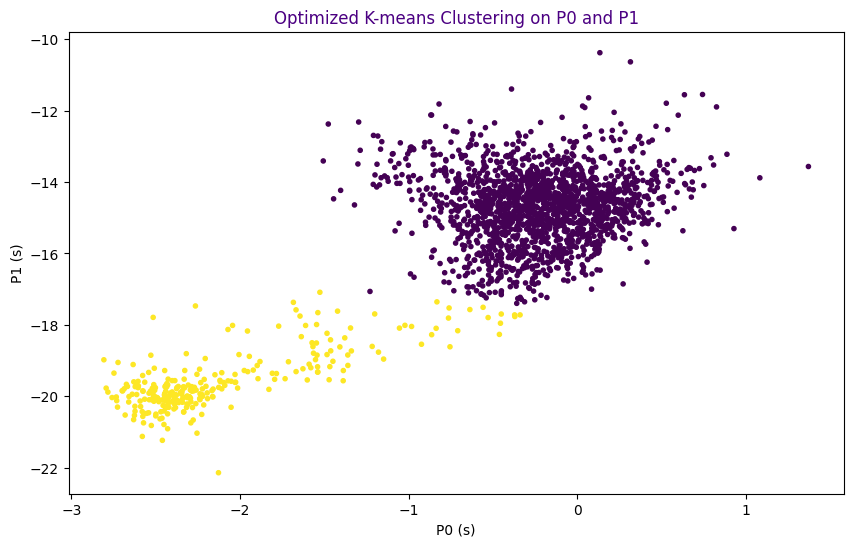

In [19]:
# Plot the optimized K Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['log_P0'],
            filtered_data['log_P1'],
            c=filtered_data['Cluster'],
            cmap='viridis',
            marker='.'
            )
plt.title('Optimized K-means Clustering on P0 and P1',color ='indigo')
plt.xlabel('P0 (s)')
plt.ylabel('P1 (s)')
plt.show()

# **K MEANS CLUSTERING WITH 4 FEATURES**

In [20]:
X_1=filtered_data[['log_P0','log_P1','S1400','DM']]

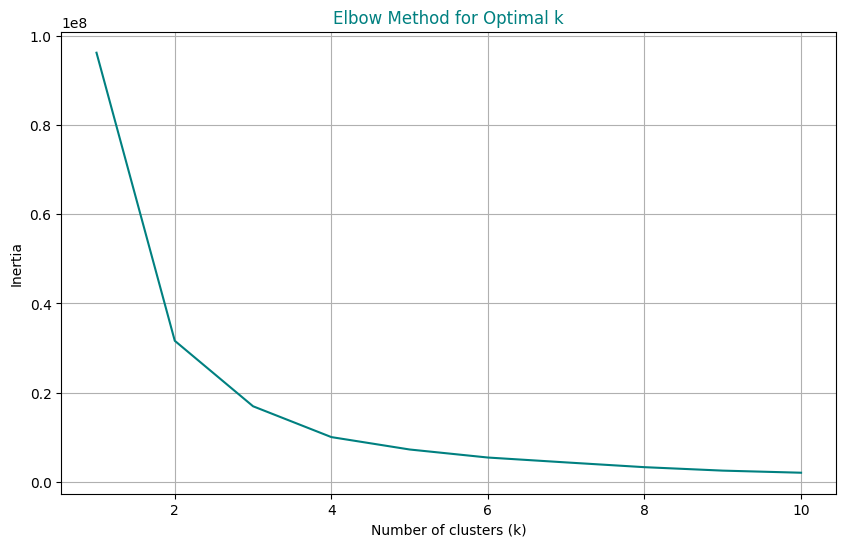

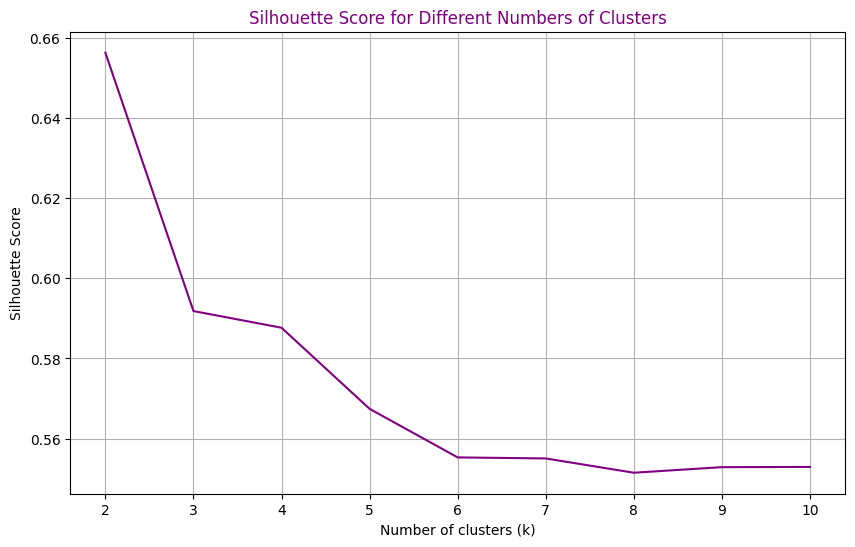

In [21]:
#looking for optimal K values by using the Elbow method and Silhouette scores

K = range(1, 11)
inertia = []
silhouette_scores = []

#Elbow method
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_1)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, color='teal')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', color='teal')
plt.grid(True)
plt.show()


#silhouette score
for k in K[1:]:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X_1)
  silhouette_scores.append(silhouette_score(X_1,labels))


# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, label='Silhouette Score', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)

plt.show()

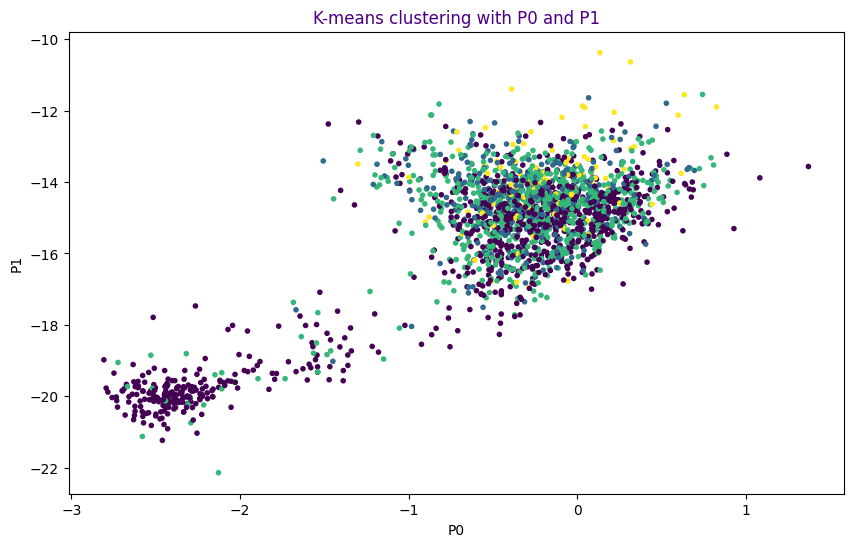

In [22]:
#applying K means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state = 42)
filtered_data['Cluster'] = kmeans.fit_predict(X_1)

#plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(filtered_data['log_P0'],
            filtered_data['log_P1'],
            cmap='viridis',
            c=filtered_data['Cluster'],
            marker='.'
            )
plt.xlabel('P0')
plt.ylabel('P1')
plt.title('K-means clustering with P0 and P1',color='indigo')
plt.show()

In [23]:
#creating paramgrids for optimizing K-Means
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500],
    'tol': [1e-4, 1e-3, 1e-2]
}

# defining silhouette scorer function to get custom silhouette score
def silhouette_scorer(estimator, X_1):
  return silhouette_score(X_1, estimator.fit_predict(X_1))


#initializing  GridsearchCV
grid_searchCV = GridSearchCV(KMeans(random_state = 42),
                             param_grid,
                             scoring=silhouette_scorer
                             )

#fit GridSearchCV
grid_searchCV.fit(X_1)

#find best parameter with grid search
best_parameters = grid_searchCV.best_params_
print("The best parameters found:",best_parameters)



The best parameters found: {'init': 'k-means++', 'max_iter': 300, 'n_init': 30, 'tol': 0.01}


In [24]:
#apply KMeans with best parameters
kmeans= KMeans(n_clusters=4,
               init=best_parameters['init'],
               n_init=best_parameters['n_init'],
               max_iter=best_parameters['max_iter'],
               tol=best_parameters['tol'],
               random_state=42)

filtered_data['Cluster'] = kmeans.fit_predict(X_1)

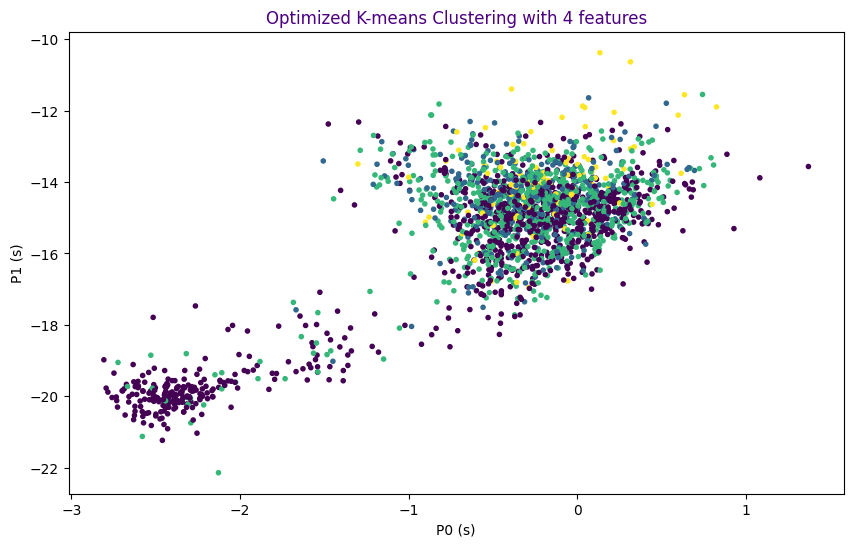

In [26]:
# Plot the optimized K Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_1['log_P0'],
            X_1['log_P1'],
            c=filtered_data['Cluster'],
            cmap='viridis',
            marker='.'
            )
plt.title('Optimized K-means Clustering with 4 features',color ='indigo')
plt.xlabel('P0 (s)')
plt.ylabel('P1 (s)')
plt.show()

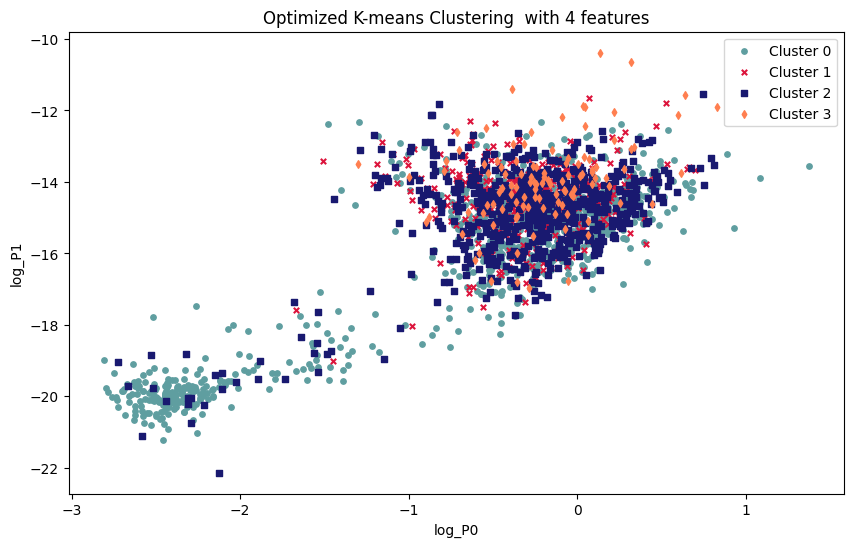

In [36]:

#giving unique cluster labels
unique_clusters = np.unique(filtered_data['Cluster'])

# creating a dictionary for color and a marker for each cluster
cluster_styles = {
    0: {'color': 'cadetblue', 'marker': 'o'},
    1: {'color': 'crimson', 'marker': 'x'},
    2: {'color': 'midnightblue', 'marker': 's'},
    3: {'color': 'coral', 'marker': 'd'},

}


plt.figure(figsize=(10, 6))

for cluster in unique_clusters:
    # Filter the data for each cluster
    cluster_data = X_1[filtered_data['Cluster'] == cluster]


    style = cluster_styles.get(cluster)


    plt.scatter(cluster_data['log_P0'], cluster_data['log_P1'],
                color=style['color'], marker=style['marker'],
                s=15, label=f'Cluster {cluster}')

# Adding labels and title
plt.title('Optimized K-means Clustering  with 4 features')
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.legend()
plt.show()


# **HIERARCHIAL CLUSTERING WITH 2 FEATURES**

In [37]:
X = filtered_data[['log_P0','log_P1']]

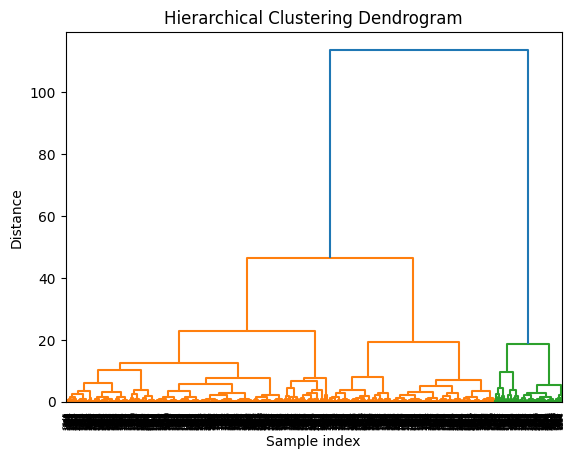

In [43]:
# Perform hierarchical clustering
linked = sch.linkage(X, method='ward')

sch.dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

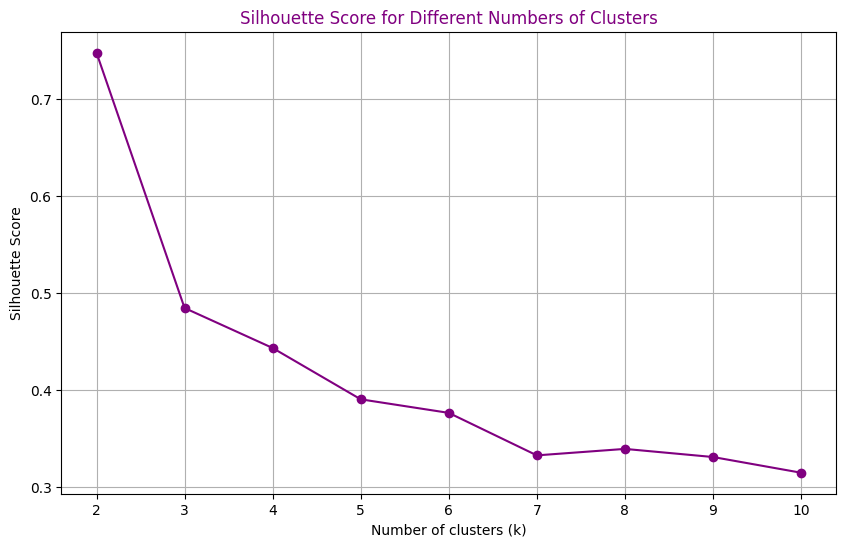

Optimal number of clusters: 2


In [53]:
# finding silhouette score for agglomerative clustering
K = range(2, 11)
silhouette_scores = []

# Calculate silhouette scores
for k in K:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the resulting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the silhouette score plot
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

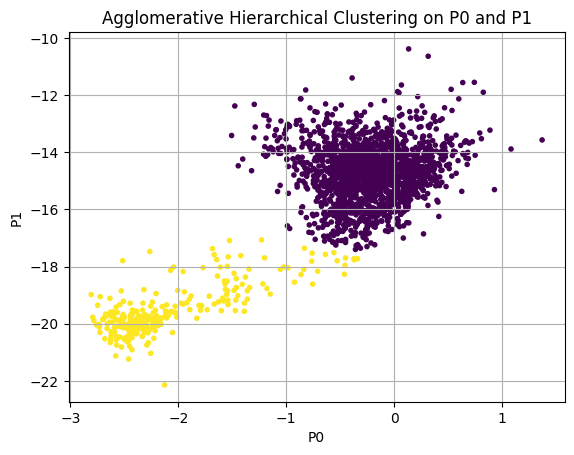

In [52]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

y_hc = hc.fit_predict(X)
# Adding the clusters to the DataFrame
filtered_data['Cluster'] = y_hc

#plot the clusters
plt.scatter(filtered_data['log_P0'], filtered_data['log_P1'], cmap='viridis',c=filtered_data['Cluster'], marker='.')
plt.title('Agglomerative Hierarchical Clustering on P0 and P1')
plt.xlabel('P0')
plt.ylabel('P1')
plt.grid(True)
plt.show()

In [45]:
# Plot silhouette scores for each sample

silhouette_avg = silhouette_score(X, y_hc)
print(f'Average Silhouette Score: {silhouette_avg:.2f}')


Average Silhouette Score: 0.75


In [47]:
# Set up parameters for grid search
param_grid = {
    'linkage': ['ward', 'complete', 'average', 'single'],
    'affinity': ['euclidean',  'manhattan', 'cosine']
}

# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Perform grid search
grid_search = GridSearchCV(
    AgglomerativeClustering(optimal_k),
    param_grid,
    scoring=silhouette_scorer
)
grid_search.fit(X)

GridSearchCV(estimator=AgglomerativeClustering(),
             param_grid={'affinity': ['euclidean', 'manhattan', 'cosine'],
                         'linkage': ['ward', 'complete', 'average', 'single']},
             scoring=<function silhouette_scorer at 0x7f79d8622cb0>)

In [48]:
# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_parameters}")
print(f"Best Silhouette Score: {best_score}")


Best Parameters: {'affinity': 'manhattan', 'linkage': 'average'}
Best Silhouette Score: 0.7485882564066367


In [49]:
# Fit the model with the best parameters
best_model = AgglomerativeClustering(n_clusters=optimal_k,
                                     linkage=best_parameters['linkage'],
                                     affinity=best_parameters['affinity'])
labels = best_model.fit_predict(X)

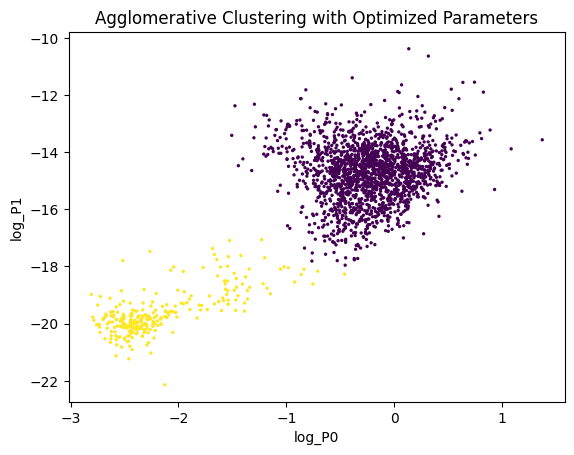

Silhouette Score: 0.750


In [50]:

# Visualize the resulting clusters
plt.scatter(X['log_P0'], X['log_P1'], c=labels, cmap='viridis', s=2)
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.title('Agglomerative Clustering with Optimized Parameters')
plt.show()

# Calculate and print silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')